In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv(r'F:\jupyter\educational-\exercise\time\csv\book_sales.csv', parse_dates=["Date"]).drop('Paperback', axis=1)
data.head()

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30 non-null     datetime64[ns]
 1   Hardcover  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [5]:
data = data.set_index("Date")
data = data.to_period()
data.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [ ]:

df = data.copy()

df['Time'] = np.arange(len(data.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [ ]:
from sklearn.model_selection import train_test_split


# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Hardcover']  # target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model prediction on train data
y_pred = pd.Series(slr.predict(X), index=X.index)

In [ ]:
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [24, 30]

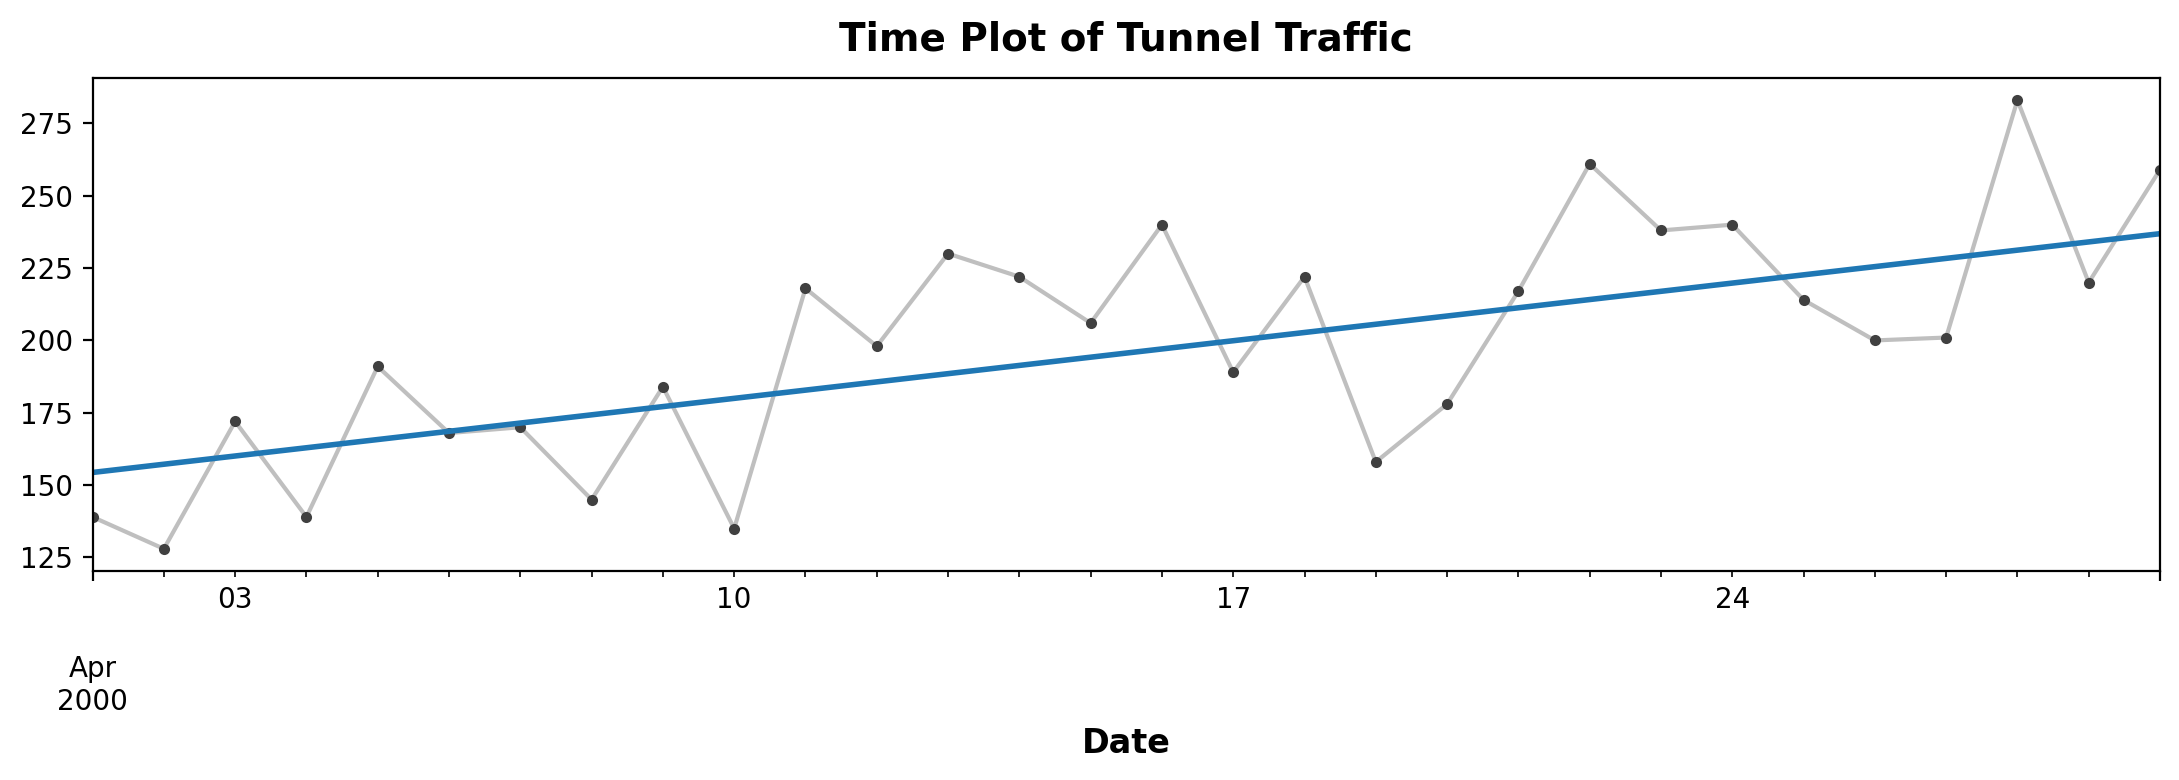

In [ ]:
from warnings import simplefilter


simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=2)
ax.set_title('Time Plot of Tunnel Traffic');